In [ ]:
##CUSTOMER CHURN PREDICTION##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #ignore unwanted warnings

In [ ]:
warnings.simplefilter('ignore')

In [ ]:
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

In [ ]:
client_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [ ]:
price_data.head(2)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [ ]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
#checking duplicates
print(client_data[client_data.duplicated()])
print(price_data[price_data.duplicated()])

Empty DataFrame
Columns: [id, channel_sales, cons_12m, cons_gas_12m, cons_last_month, date_activ, date_end, date_modif_prod, date_renewal, forecast_cons_12m, forecast_cons_year, forecast_discount_energy, forecast_meter_rent_12m, forecast_price_energy_off_peak, forecast_price_energy_peak, forecast_price_pow_off_peak, has_gas, imp_cons, margin_gross_pow_ele, margin_net_pow_ele, nb_prod_act, net_margin, num_years_antig, origin_up, pow_max, churn]
Index: []

[0 rows x 26 columns]
Empty DataFrame
Columns: [id, price_date, price_off_peak_var, price_peak_var, price_mid_peak_var, price_off_peak_fix, price_peak_fix, price_mid_peak_fix]
Index: []


In [ ]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [ ]:
client_data.shape

(14606, 26)

In [ ]:
print('Number of Unique Clinets: ',price_data.id.nunique())

Number of Unique Clinets:  16096


In [ ]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [ ]:
price_data.shape

(193002, 8)

In [ ]:
#Merging Client & Price dataset using Customer  ID
client_churn_info = client_data[['id','churn']]
price_df = client_churn_info.merge(price_data,on='id')
price_df.head()

,id,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


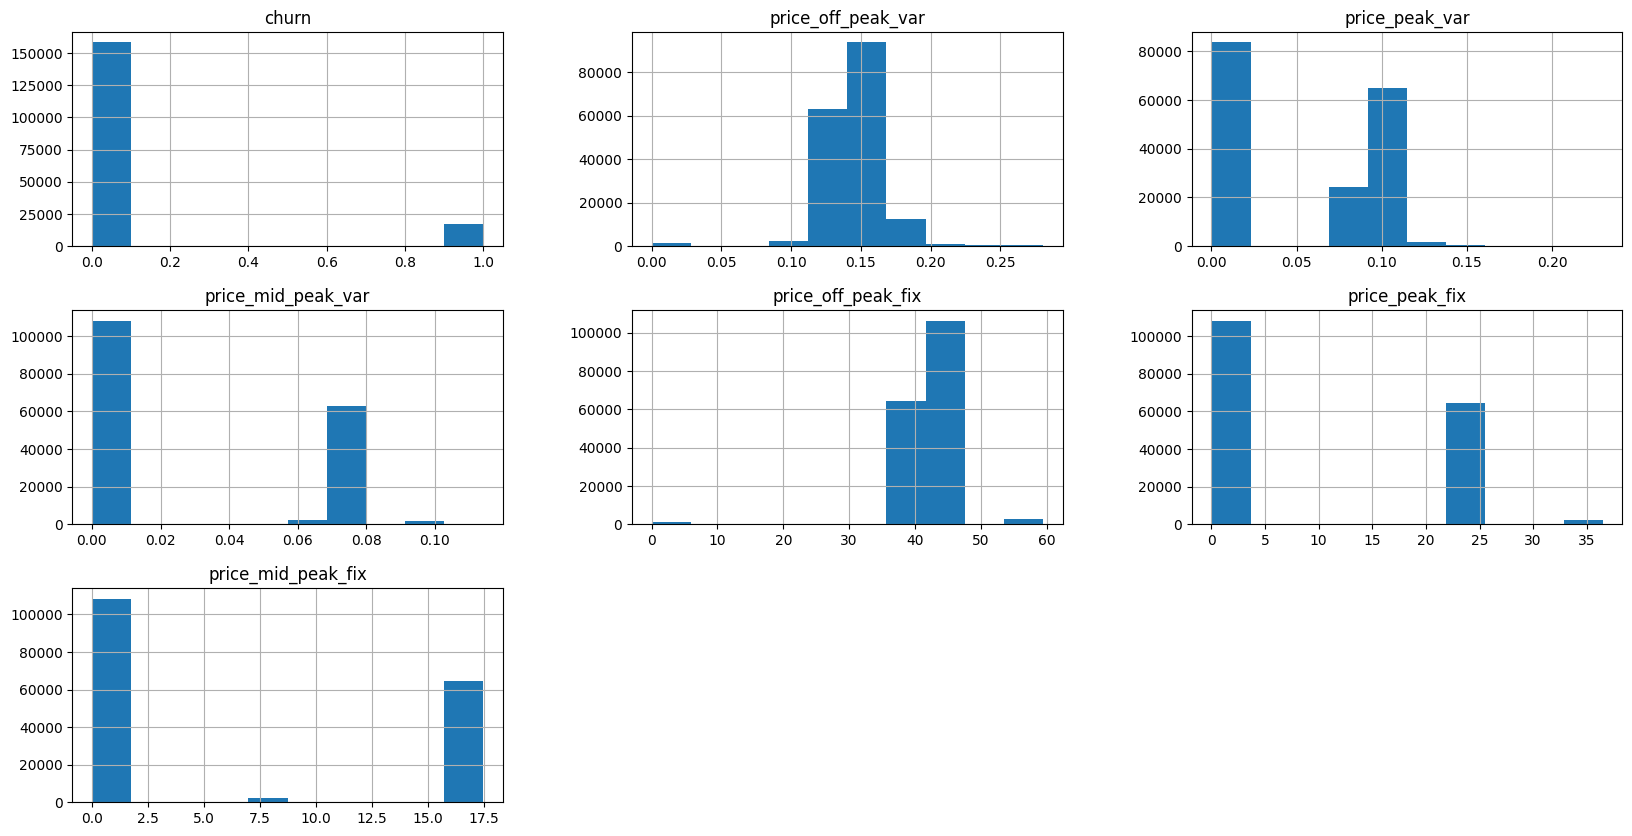

In [ ]:
#Plotting histogram to see the distribution of the data using the mean values of both clinet and price datasets
price_df.groupby(['id','price_date']).mean().hist(figsize=(20,10))
plt.show()

The above HistPlot shows that the data is skewed and it should need to be treated before model creation

In [ ]:
#Since the price date is in object state, convert it into date format
#Changing datatype : price date => object -> datetime64
price_data = price_data.astype({'price_date' : 'datetime64[ns]'})

In [ ]:
#Plotting both Energy and Power prices as per the CHURN category by price dated months
churn_grp_price = price_df[price_df['churn']==1].groupby(['price_date'])[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']].mean()
non_churn_grp_price = price_df[price_df['churn']==0].groupby('price_date')[['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']].mean()

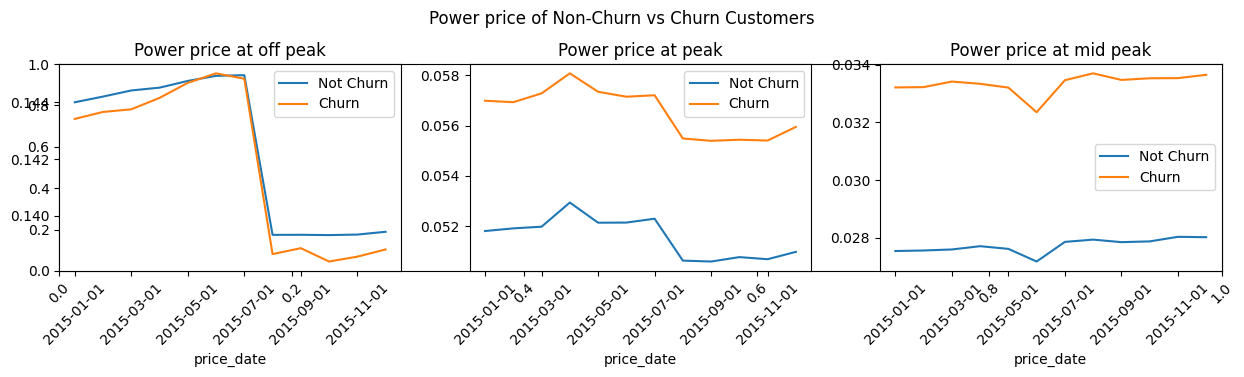

In [ ]:
#Plotting average price of energy by month
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.subplot(131)
non_churn_grp_price.price_off_peak_var.plot()
churn_grp_price.price_off_peak_var.plot()
plt.xticks(rotation=45)
plt.legend(['Not Churn','Churn'])
plt.title('Power price at off peak')
plt.subplot(132)
non_churn_grp_price.price_peak_var.plot()
churn_grp_price.price_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at peak')
plt.xticks(rotation=45)
plt.subplot(133)
non_churn_grp_price.price_mid_peak_var.plot()
churn_grp_price.price_mid_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at mid peak')
plt.xticks(rotation=45)
plt.suptitle('Power price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()


Churned clients have lower off-peak energy prices and higher peak and mid-peak prices compared to un-churned clients. However, these price differences may not be the sole factor for churn. Further data analysis is needed for a conclusive answer.

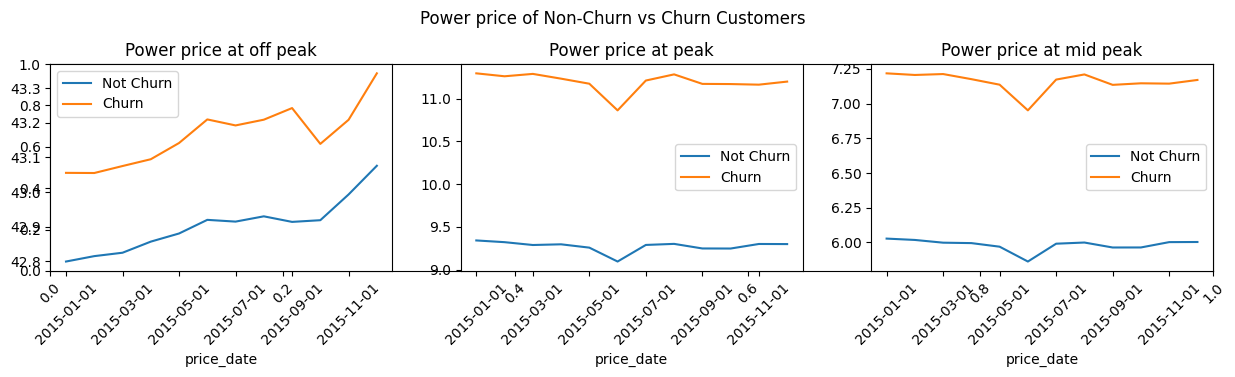

In [ ]:
#Replotting by the average price of power through month
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.subplot(131)
non_churn_grp_price.price_off_peak_fix.plot()
churn_grp_price.price_off_peak_fix.plot()
plt.xticks(rotation=45)
plt.legend(['Not Churn','Churn'])
plt.title('Power price at off peak')
plt.subplot(132)
non_churn_grp_price.price_peak_fix.plot()
churn_grp_price.price_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at peak')
plt.xticks(rotation=45)
plt.subplot(133)
non_churn_grp_price.price_mid_peak_fix.plot()
churn_grp_price.price_mid_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at mid peak')
plt.xticks(rotation=45)
plt.suptitle('Power price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()

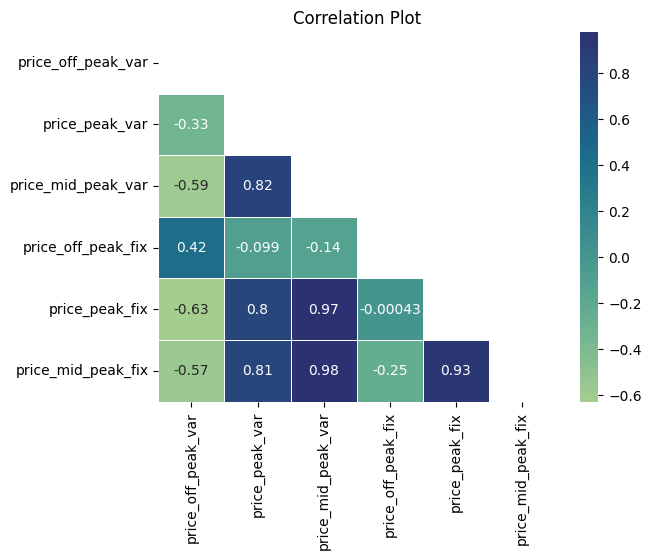

In [ ]:
#Let's find the Correaltional Heatmap before merging the final datasets in order to identify the features that replicating the same information
pd_corr = price_data.corr(numeric_only=True)
mask = np.triu(np.ones_like(pd_corr))
sns.heatmap(pd_corr,annot=True,cmap="crest",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

High correlation coefficient values between two features indicate a strong dependency between them, meaning they convey the same information. This suggests that one of the features can be removed.

In [ ]:
#Since there are multiple non-necessary price values, let's sort them using the above data of Heatmap
price_data.drop(['price_peak_var','price_peak_fix','price_mid_peak_var'],axis=1,inplace=True)

Due to the pricing being on a monthly basis, merging it with client data directly is not possible. Yearly prices need to be derived by transforming some features. The energy prices follow a linear trend, so the average of monthly prices can be taken. The off-peak energy price was high in the beginning of the year and low at the end, thus the price difference is considered as a consolidated value.

In [ ]:
#Filtering out the January and December energy off peak price
price_off_peak_energy = price_data[['id','price_off_peak_var']]
jan_prices = price_off_peak_energy.groupby('id').price_off_peak_var.first().reset_index().rename(columns={'price_off_peak_var':'price_off_peak_var_jan'})
dec_prices = price_off_peak_energy.groupby('id').last().price_off_peak_var.reset_index().rename(columns={'price_off_peak_var':'price_off_peak_var_dec'})

In [ ]:
price_data.drop('price_off_peak_var',axis=1,inplace=True)
#Taking average of Power off-peak and mid-peak
price_data = price_data.groupby('id').mean().reset_index()

In [ ]:
price_data = price_data.merge(jan_prices,on='id').merge(dec_prices,on='id')
price_data['energy_off_peak_variation'] = price_data.price_off_peak_var_jan - price_data.price_off_peak_var_dec
price_data.drop(['price_off_peak_var_jan','price_off_peak_var_dec'],axis=1,inplace=True)

In [ ]:
#Final price dataset
price_data.head()

,id,price_date,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,40.701732,16.280694,0.006192
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,44.385450,0.000000,0.004104
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,45.319710,0.000000,-0.050443
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,40.647427,16.258971,0.010018
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,44.266930,0.000000,0.003994


Since the price dataset has been cleaned, now sort the client dataset

In [ ]:
#Changing hashed values to meaningful labels for easy understanding in both sales channels and in origin campaign
print('Unique Sales Channels : \n',client_data.channel_sales.unique())
print('\nUnique Origin Campaign : \n',client_data.origin_up.unique())

Unique Sales Channels : 
 ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']

Unique Origin Campaign : 
 ['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' 'MISSING'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']


In [ ]:
channel_mask = {
    'MISSING':'missing_data',
    'foosdfpfkusacimwkcsosbicdxkicaua':'channel_1',
    'lmkebamcaaclubfxadlmueccxoimlema':'channel_2',
    'usilxuppasemubllopkaafesmlibmsdf':'channel_3',
    'ewpakwlliwisiwduibdlfmalxowmwpci':'channel_4',
    'epumfxlbckeskwekxbiuasklxalciiuu':'channel_5',
    'sddiedcslfslkckwlfkdpoeeailfpeds':'channel_6',
    'fixdbufsefwooaasfcxdxadsiekoceaa':'channel_7',
}
origin_mask = {
    'lxidpiddsbxsbosboudacockeimpuepw' : 'origin_1',
    'kamkkxfxxuwbdslkwifmmcsiusiuosws' : 'origin_2',
    'ldkssxwpmemidmecebumciepifcamkci' : 'origin_3',
    'usapbepcfoloekilkwsdiboslwaxobdp' : 'origin_4',
    'ewxeelcelemmiwuafmddpobolfuxioce' : 'origin_5',
    'MISSING' : 'origin_missing'
}
client_data.replace({
    'has_gas' : {
        't':1,'f':0
    },
    'channel_sales':channel_mask,
    'origin_up':origin_mask,
},inplace=True)
#Final client dataset
client_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.0,25.44,25.44,2,678.99,3,origin_1,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,missing_data,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.0,16.38,16.38,1,18.89,6,origin_2,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,channel_1,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.0,28.60,28.60,1,6.60,6,origin_2,13.856,0


In [ ]:
df = client_data.merge(price_data,on='id')
print('Total No of Clients in Price Dataset : ',price_data.id.nunique(),'\nTotal No of Clients in Client Dataset : ',client_data.id.nunique(),'\nTotal No of Clients after merging : ',df.id.nunique())

Total No of Clients in Price Dataset :  16096 
Total No of Clients in Client Dataset :  14606 
Total No of Clients after merging :  14606


not churned [0.90284814]
churned [0.09715186]


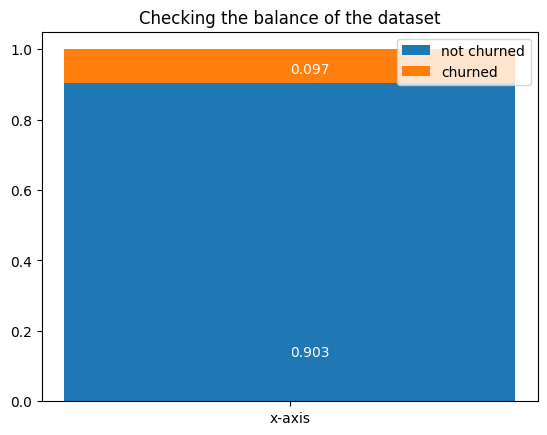

In [ ]:
fig, ax = plt.subplots()
bottom = np.zeros(1)

values = {
    "not churned":np.array([client_data.churn.value_counts()[0] /(client_data.churn.value_counts()[0]+client_data.churn.value_counts()[1])]),
    "churned":np.array([client_data.churn.value_counts()[1] /(client_data.churn.value_counts()[0]+client_data.churn.value_counts()[1])])
}
bottom=[0]

for boolean, weight_count in values.items():
    print(boolean, weight_count)
    p = ax.bar(["x-axis"],weight_count, 0.5, label=boolean, bottom=bottom, align='center')
    ax.annotate(round(weight_count[0],3), ('x-axis',1-weight_count[0]+0.03), color='white')
    bottom+=weight_count
ax.set_title("Checking the balance of the dataset")
ax.legend(loc='upper right')

Since the data imbalance is high. Let's find it through the seperate channel wise

<Axes: title={'center': 'Channel wise churn'}, xlabel='channel_sales'>

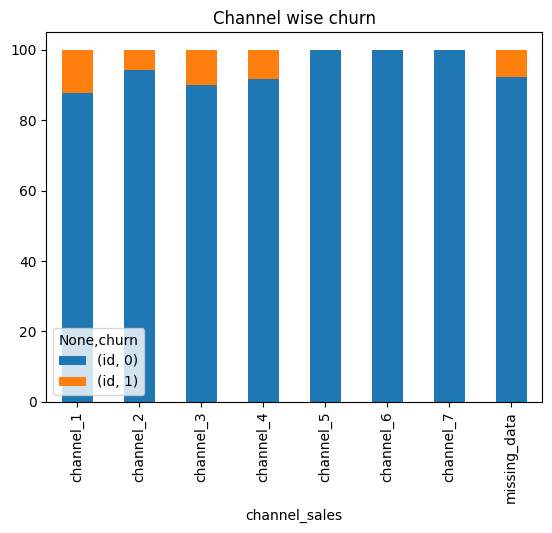

In [ ]:
channel = client_data[['churn','id','channel_sales']].groupby(['channel_sales','churn']).count().unstack().fillna(0)
channel = channel.div(channel.sum(axis=1), axis=0).mul(100)
channel.plot(kind='bar', stacked=True, title='Channel wise churn')

Now lets see the Customer's those who opted for contracr modification

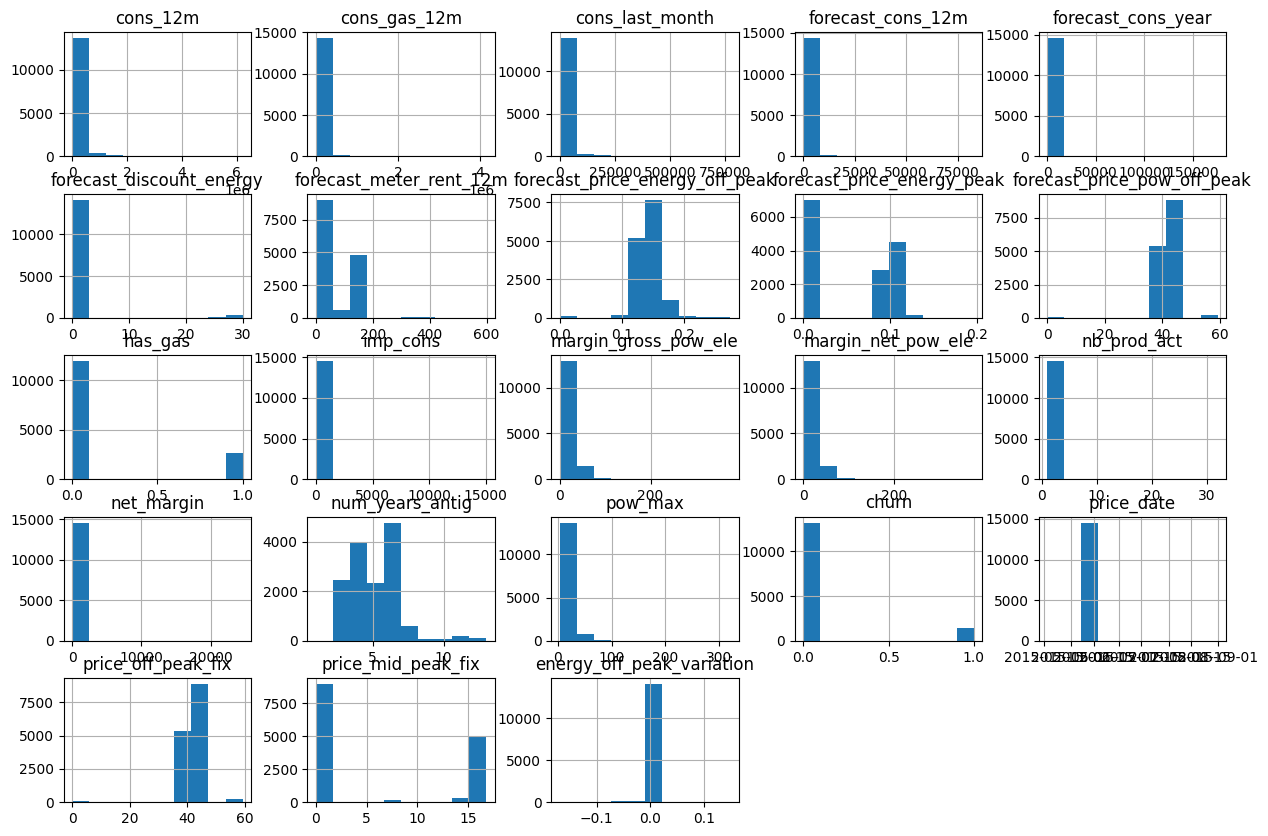

In [ ]:
df.hist(figsize=(15,10))
plt.show()

from the above histogram we find out that it has many outliers. Now, let us remove the outliers

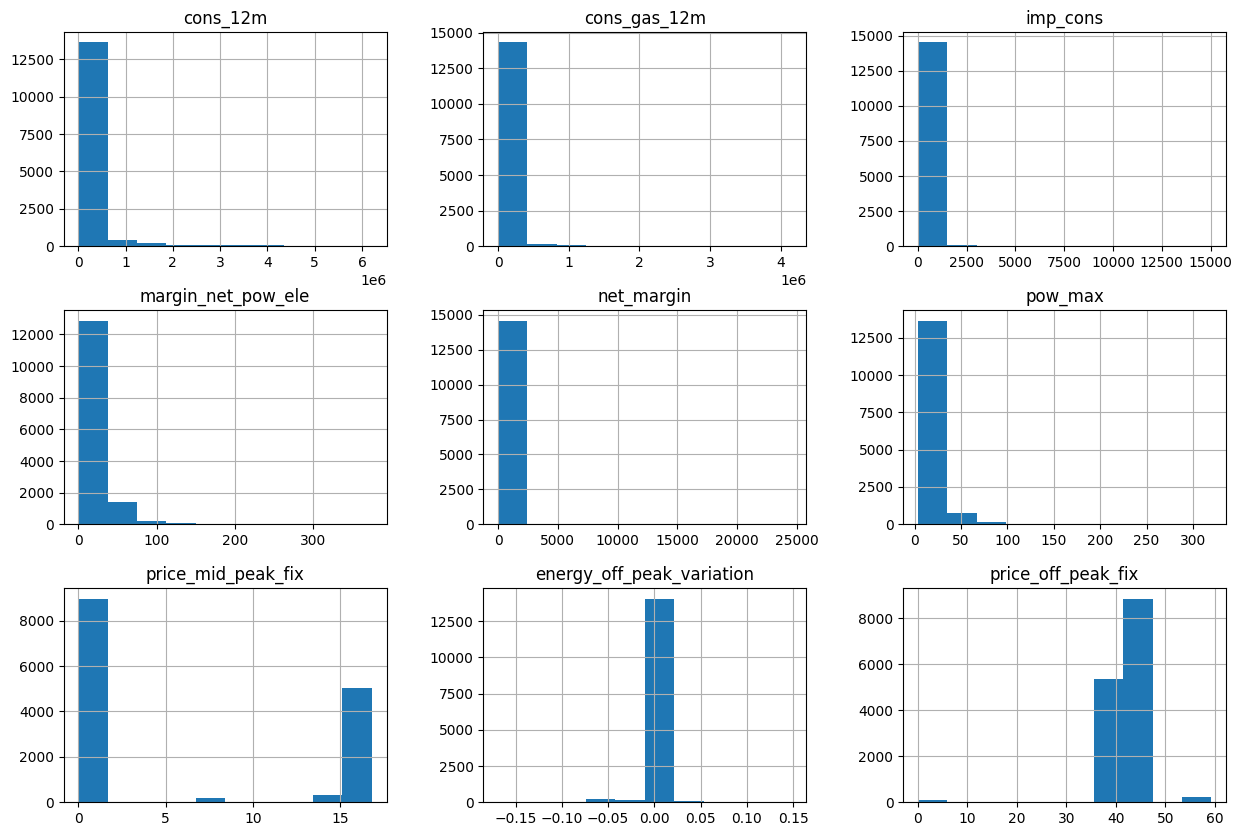

In [ ]:
ax = df.hist(figsize=(15,10),column=['cons_12m', 'cons_gas_12m', 'imp_cons', 'margin_net_pow_ele', 'net_margin',
       'pow_max',  'price_mid_peak_fix','energy_off_peak_variation','price_off_peak_fix'],bins=10)
plt.show()

Plotting a pie chart to ge the analysis of client churn

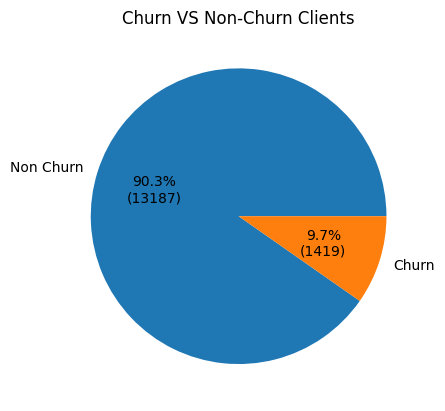

In [ ]:
def annotation_labeling(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(df.churn.value_counts(),
        labels=['Non Churn','Churn'],
        autopct=lambda x : annotation_labeling(x,df.churn.value_counts().values))
plt.title('Churn VS Non-Churn Clients')
plt.show()

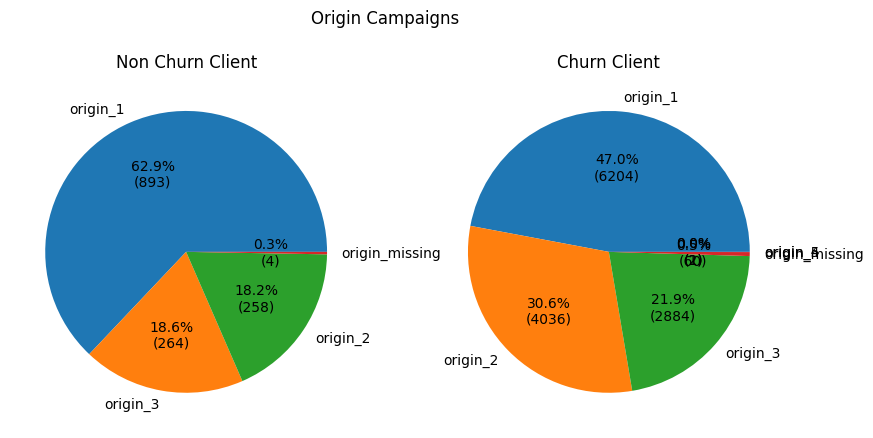

In [ ]:
def annotation_labeling(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Assuming 'df' is your DataFrame containing all client data
# and 'churn' is a column indicating churn status (1 for churn, 0 for non-churn)

# Create DataFrames for churned and non-churned clients
churn_data = df[df['churn'] == 1]
non_churn_data = df[df['churn'] == 0]

plt.figure(figsize=(10,5))

plt.subplot(122)
plt.title('Churn Client')
_,_,lbl_text = plt.pie(non_churn_data.origin_up.value_counts(),
        labels=non_churn_data.origin_up.value_counts().index,
        autopct=lambda x : annotation_labeling(x,non_churn_data.origin_up.value_counts())) #,colors=colors) remove colors

plt.subplot(121)
plt.title('Non Churn Client')
_,_,lbl_text = plt.pie(churn_data.origin_up.value_counts(),
        labels=churn_data.origin_up.value_counts().index,
        autopct=lambda x : annotation_labeling(x,churn_data.origin_up.value_counts())) #,colors=colors) remove colors

plt.suptitle("Origin Campaigns")
plt.show()

In [ ]:
clients_channel_count = df['channel_sales'].value_counts()
data = {
    'Channel Name' : clients_channel_count.index.values,
    'Channel Count' : clients_channel_count.values,
    'Percentage' : (clients_channel_count.values/client_data.shape[0])*100
}
channel_sales_data = pd.DataFrame(data)

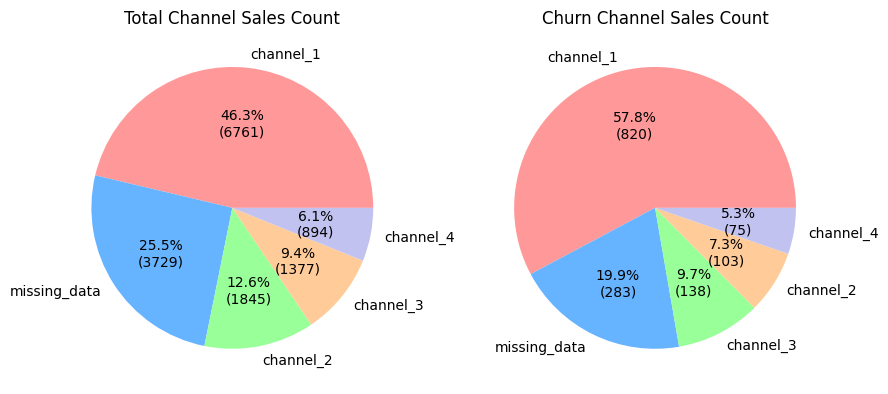

<Figure size 1000x500 with 0 Axes>

In [ ]:
def annotation_labeling(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


clients_channel_count = df['channel_sales'].value_counts()
data = {
    'Channel Name' : clients_channel_count.index.values,
    'Channel Count' : clients_channel_count.values,
    'Percentage' : (clients_channel_count.values/client_data.shape[0])*100
}
channel_sales_data = pd.DataFrame(data)


churn_channel_sales =churn_data['channel_sales'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
plt.figure(figsize=(10,5))


colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6']

_,_,ax1_text = ax1.pie(x=channel_sales_data['Channel Count'][:-3],
                       labels=channel_sales_data['Channel Name'][:-3],
                       autopct = lambda x : annotation_labeling(x,channel_sales_data['Channel Count'].values),
                       colors=colors) # Use the defined 'colors' variable
ax1.set_title('Total Channel Sales Count')
_,_,ax2_text=ax2.pie(x=churn_channel_sales.values,labels=churn_channel_sales.index,autopct = lambda x : annotation_labeling(x,churn_channel_sales.values),colors=colors)
ax2.set_title('Churn Channel Sales Count')

plt.show()


Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


for col in df.select_dtypes(include=['datetime64']).columns:
    df[col] = df[col].astype(np.int64) // 10**9

df = pd.get_dummies(df, drop_first=True)
x, y = df.drop('churn', axis=1), df.churn
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(StandardScaler().fit_transform(x)), columns=['PCA1', 'PCA2'])
pca_df['churn'] = df['churn']
pca_df.head()

,PCA1,PCA2,churn
0,0.833008,0.729163,1
1,-2.889599,-2.755633,0
2,-1.360902,0.593353,0
3,-1.277658,-1.784354,0
4,2.032979,0.062108,0


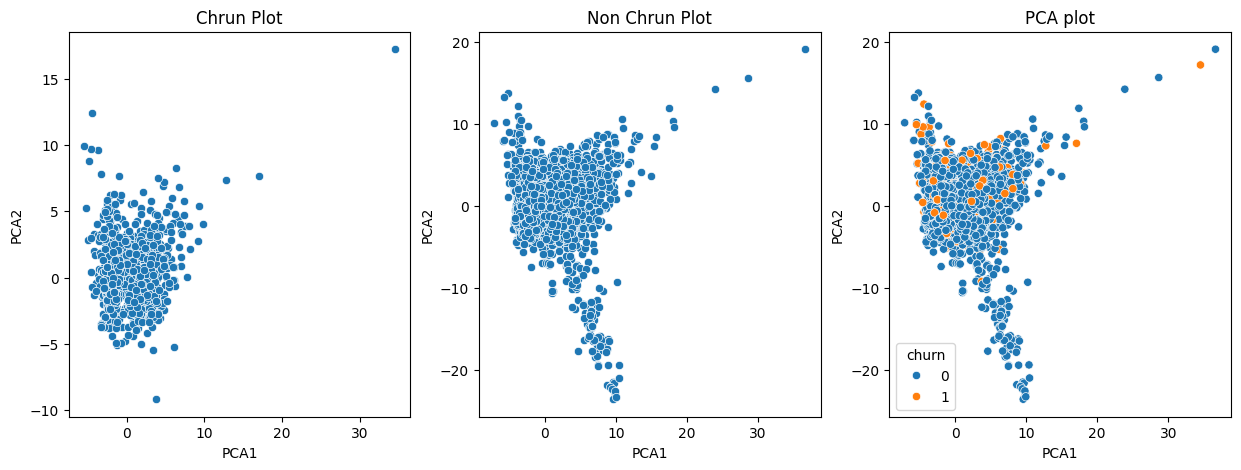

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.scatterplot(data=pca_df[pca_df['churn']==1],x='PCA1',y='PCA2')
plt.title('Chrun Plot')
plt.subplot(132)
sns.scatterplot(data=pca_df[pca_df['churn']==0],x='PCA1',y='PCA2')
plt.title('Non Chrun Plot')
plt.subplot(133)
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='churn')
plt.title('PCA plot')
plt.show()

In [ ]:
client_data.shape

(14606, 26)

From the PCA plot, we can see both churn and non-churn customers were not seperated. so, lets use the decison tree strategy

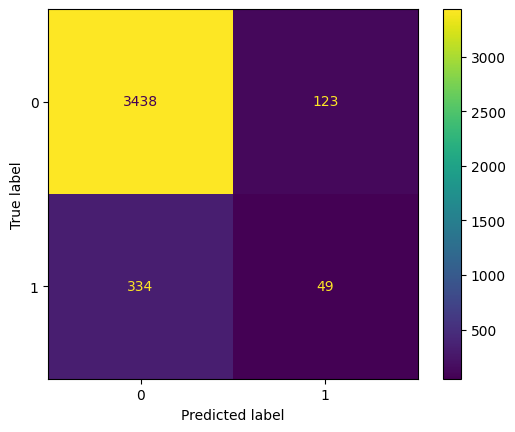

Model's f1 score for training dataset : 1.0 
Model's f1 score for test dataset : 0.17657657657657658
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3561
           1       0.28      0.13      0.18       383

    accuracy                           0.88      3944
   macro avg       0.60      0.55      0.56      3944
weighted avg       0.85      0.88      0.86      3944



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
import matplotlib.pyplot as plt

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.27,stratify=y,random_state=42)
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_train_pred = dt_model.predict(x_train)
y_pred = dt_model.predict(x_test)

cm_pred2 = confusion_matrix(y_test,y_pred,labels = dt_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=dt_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,y_train_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

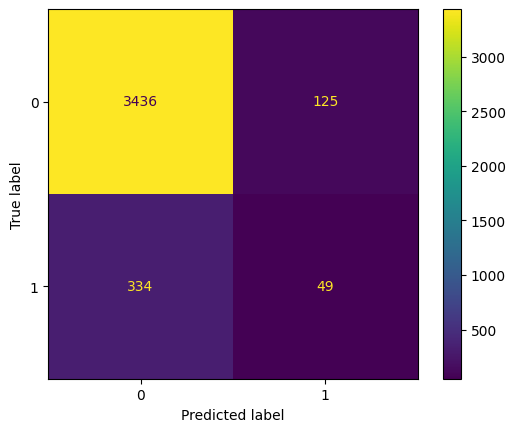

Model's f1 score for training dataset : 1.0 
Model's f1 score for test dataset : 0.17594254937163376
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3561
           1       0.28      0.13      0.18       383

    accuracy                           0.88      3944
   macro avg       0.60      0.55      0.56      3944
weighted avg       0.85      0.88      0.86      3944



In [ ]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_train_pred = dt_model.predict(x_train)
y_pred = dt_model.predict(x_test)

cm_pred2 = confusion_matrix(y_test,y_pred,labels = dt_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2,display_labels=dt_model.classes_).plot()
plt.show()

print("Model's f1 score for training dataset :",f1_score(y_train,y_train_pred),
      "\nModel's f1 score for test dataset :",f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

**Model Creation**




Logistic Regression

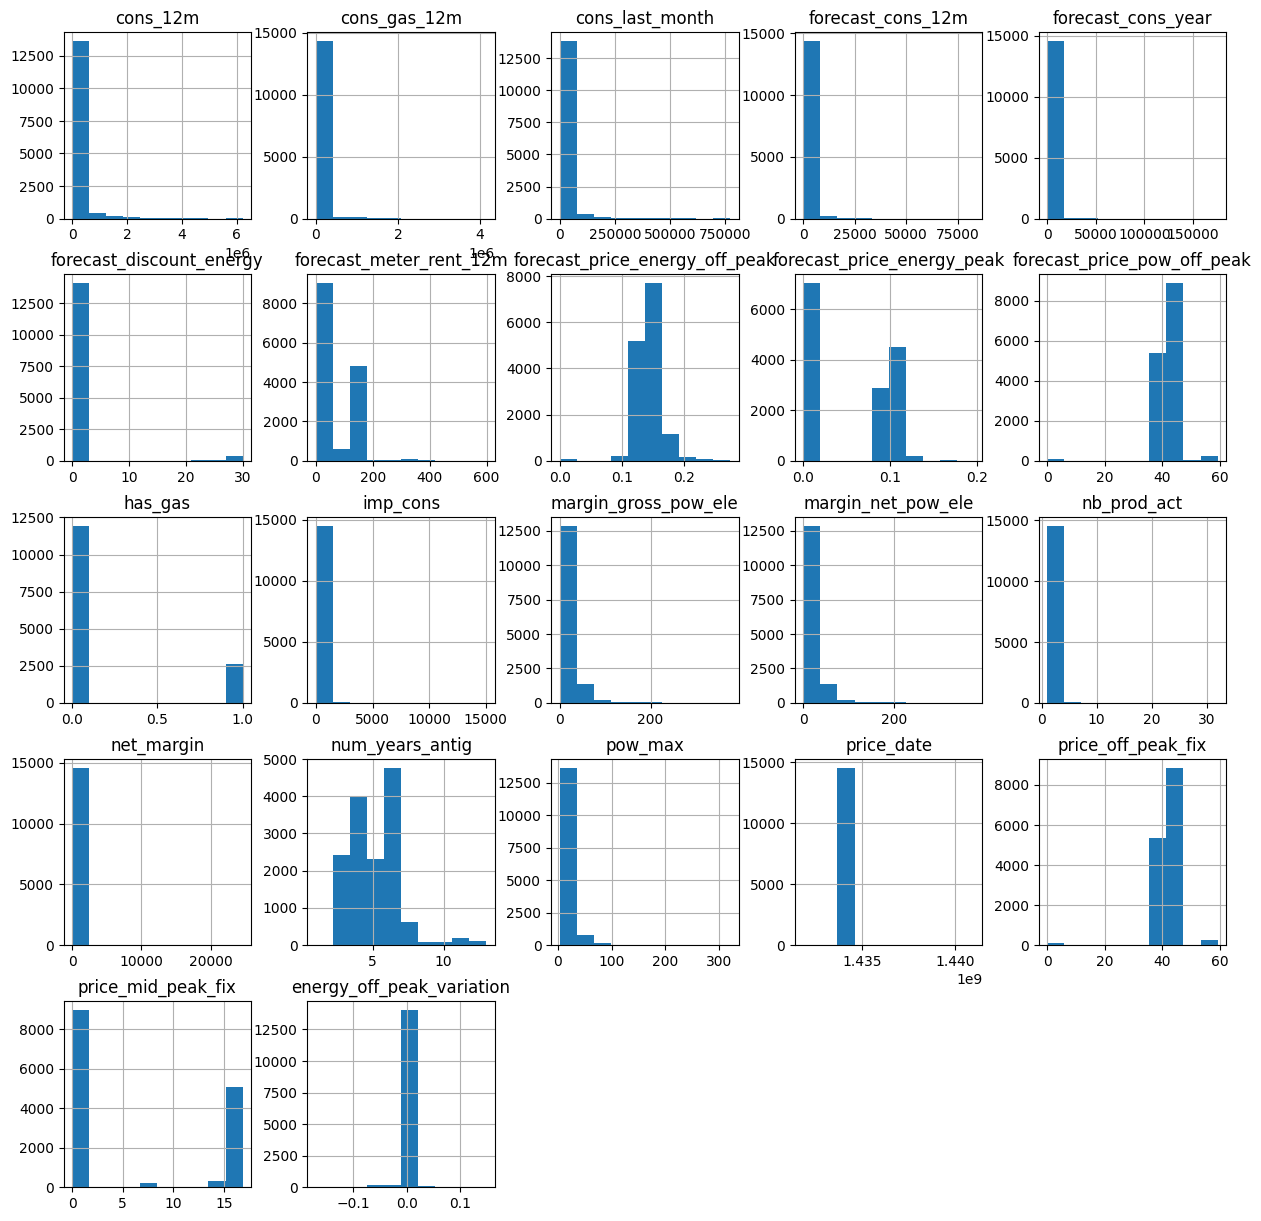

In [ ]:
#Feature distribution
x.hist(figsize=(15,15),bins=10)
plt.show()

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2617
           1       0.43      0.01      0.02       305

    accuracy                           0.90      2922
   macro avg       0.66      0.50      0.48      2922
weighted avg       0.85      0.90      0.85      2922



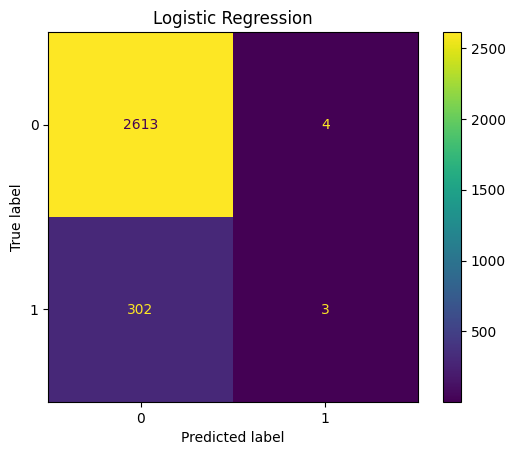

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
merged_data = pd.merge(client_data, price_data, on="id", how="inner")
label_encoder = LabelEncoder()
for column in ['channel_sales', 'has_gas', 'origin_up']:
    merged_data[column] = label_encoder.fit_transform(merged_data[column])
features = merged_data.drop(columns=['id', 'price_date', 'churn', 'date_activ', 'date_end',
                                      'date_modif_prod', 'date_renewal'])
target = merged_data['churn']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.title("Logistic Regression")
plt.show()

In [ ]:
merged_data = pd.merge(client_data, price_data, on="id", how="inner")
x_train, x_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (11684, 23)
Shape of y_train: (11684,)


Support Vector Classification

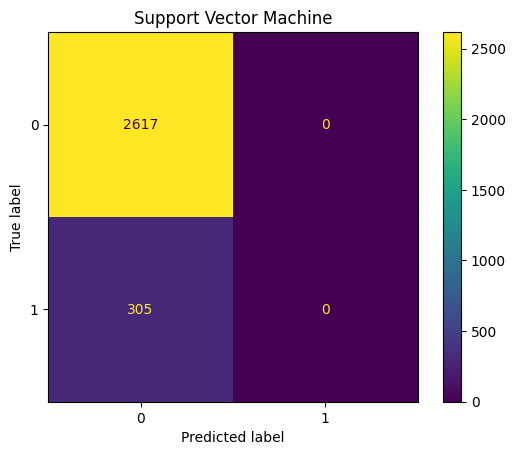

Model's f1 score for training dataset: 0.019555555555555555
Model's f1 score for test dataset: 0.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2617
           1       0.00      0.00      0.00       305

    accuracy                           0.90      2922
   macro avg       0.45      0.50      0.47      2922
weighted avg       0.80      0.90      0.85      2922



In [ ]:
from sklearn.svm import SVC #Import SVC from the correct module
svc_model = SVC(random_state=0).fit(x_train, y_train)
yt_pred, y_pred = svc_model.predict(x_train), svc_model.predict(x_test)
cm_pred2 = confusion_matrix(y_test, y_pred, labels=svc_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_pred2, display_labels=svc_model.classes_).plot()
plt.title("Support Vector Machine")
plt.show()

print("Model's f1 score for training dataset:", f1_score(y_train, yt_pred))
print("Model's f1 score for test dataset:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN

KNN Accuracy: 0.8942505133470225
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2617
           1       0.33      0.01      0.03       305

    accuracy                           0.89      2922
   macro avg       0.61      0.51      0.48      2922
weighted avg       0.84      0.89      0.85      2922



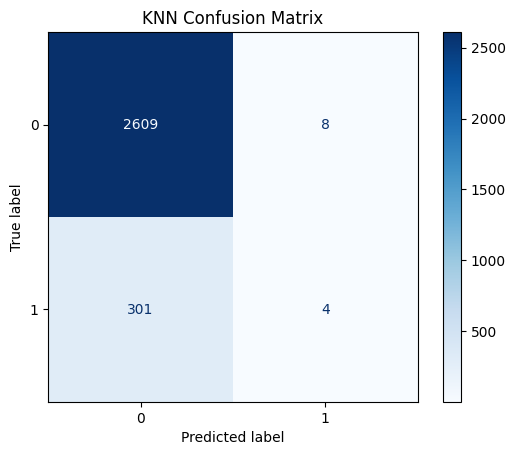

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

predicted_y_knn = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)

conf_matrix_knn = confusion_matrix(y_test, predicted_y_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=knn_model.classes_).plot(cmap=plt.cm.Blues)

print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:")
print(classification_report(y_test, predicted_y_knn))

plt.title("KNN Confusion Matrix")
plt.show()


Random Forest

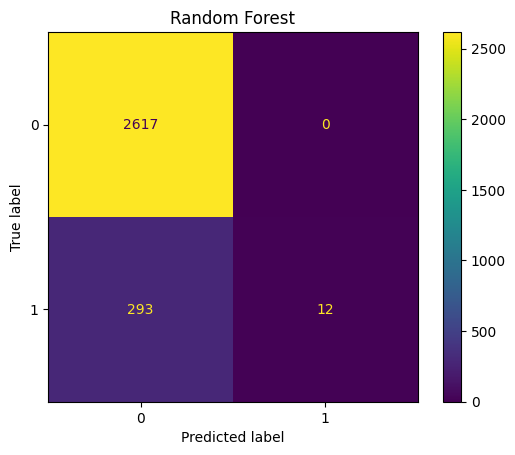

Model's f1 score for training dataset: 1.0
Model's f1 score for test dataset: 0.07570977917981073
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       1.00      0.04      0.08       305

    accuracy                           0.90      2922
   macro avg       0.95      0.52      0.51      2922
weighted avg       0.91      0.90      0.86      2922



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0).fit(x_train, y_train)
yt_pred, y_pred = rf_model.predict(x_train), rf_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                       display_labels=rf_model.classes_).plot()
plt.title("Random Forest")
plt.show()

print("Model's f1 score for training dataset:", f1_score(y_train, yt_pred))
print("Model's f1 score for test dataset:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


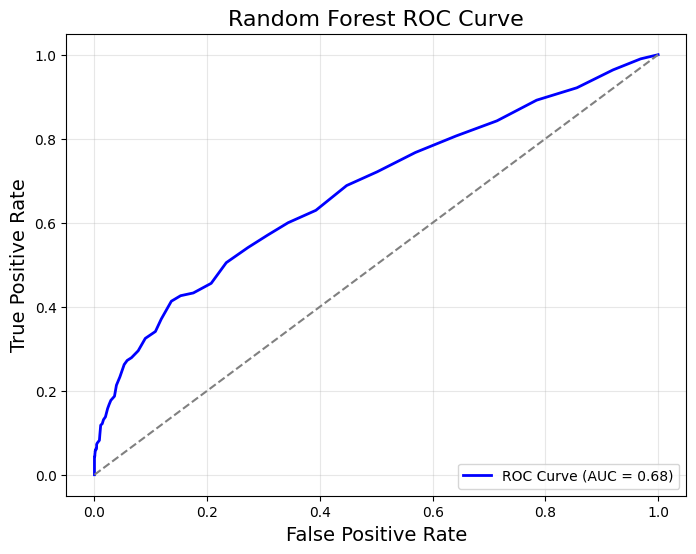

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_probs = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Decison Tree

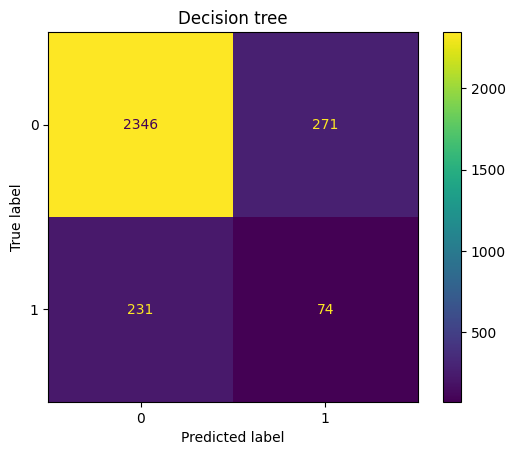

Model's f1 score for training dataset: 1.0
Model's f1 score for test dataset: 0.2276923076923077
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2617
           1       0.21      0.24      0.23       305

    accuracy                           0.83      2922
   macro avg       0.56      0.57      0.57      2922
weighted avg       0.84      0.83      0.83      2922



In [ ]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier().fit(x_train, y_train)
y_train_pred, y_pred = dt_model.predict(x_train), dt_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                       display_labels=dt_model.classes_).plot()
plt.title("Decision tree")
plt.show()

print(f"Model's f1 score for training dataset: {f1_score(y_train, y_train_pred)}")
print(f"Model's f1 score for test dataset: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Artificial Neural Network

Epoch 1/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7630 - loss: 0.5033 - val_accuracy: 0.9024 - val_loss: 0.3150
Epoch 2/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9043 - loss: 0.3181 - val_accuracy: 0.9024 - val_loss: 0.3088
Epoch 3/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9060 - loss: 0.3047 - val_accuracy: 0.9024 - val_loss: 0.3063
Epoch 4/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8990 - loss: 0.3177 - val_accuracy: 0.9024 - val_loss: 0.3098
Epoch 5/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9077 - loss: 0.3000 - val_accuracy: 0.9024 - val_loss: 0.3058
Epoch 6/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9084 - loss: 0.2971 - val_accuracy: 0.9024 - val_loss: 0.3044
Epoch 7/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9056 - loss: 0.2986 - val_accuracy: 0.9024 - val_loss: 0.3036
Epoch 8/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8991 - loss: 0.3102 - val_accuracy: 0.

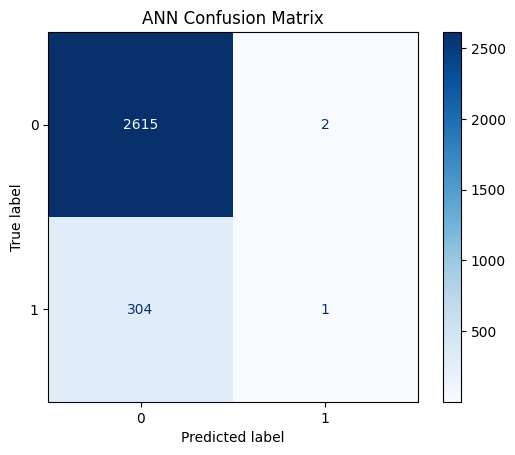

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

y_pred_ann = (model.predict(X_test) > 0.5).astype(int)
accuracy_ann = model.evaluate(X_test, y_test, verbose=0)[1]

print("ANN Accuracy:", accuracy_ann)
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ann, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
plt.title("ANN Confusion Matrix")
plt.show()

XGBoost Accuracy: 0.8980150581793293
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2617
           1       0.56      0.10      0.18       305

    accuracy                           0.90      2922
   macro avg       0.73      0.55      0.56      2922
weighted avg       0.87      0.90      0.87      2922



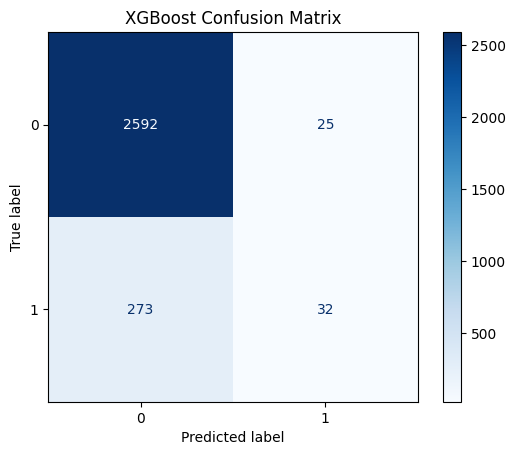

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = xgb_model.score(X_test, y_test)
print("XGBoost Accuracy:", accuracy_xgb)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=xgb_model.classes_).plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()


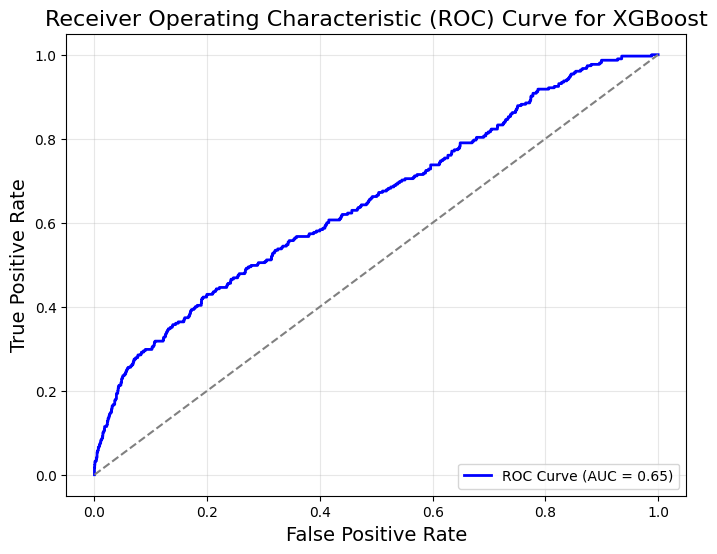

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Now XGBClassifier is defined
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)
xgb_model.fit(X_train, y_train)

y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Comparing Random forest and XGBoost

Random Forest Accuracy: 0.9000684462696783
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.88      0.05      0.09       305

    accuracy                           0.90      2922
   macro avg       0.89      0.52      0.52      2922
weighted avg       0.90      0.90      0.86      2922



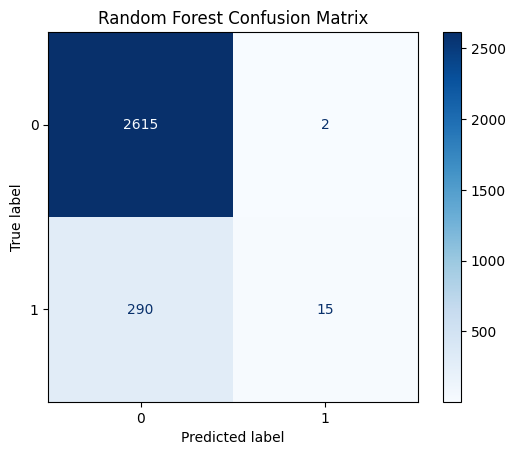

XGBoost Accuracy: 0.8980150581793293
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2617
           1       0.56      0.10      0.18       305

    accuracy                           0.90      2922
   macro avg       0.73      0.55      0.56      2922
weighted avg       0.87      0.90      0.87      2922



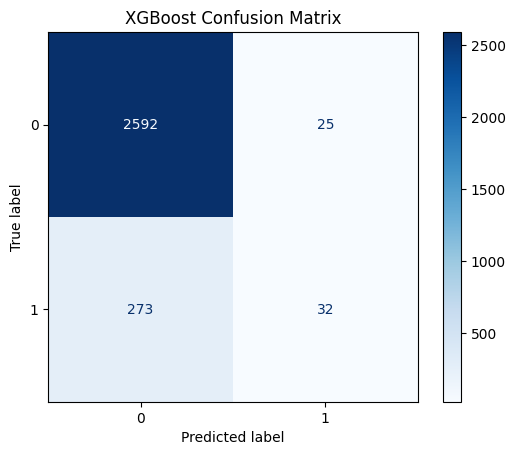

Random Forest Training Time: 4.5922 seconds
XGBoost Training Time: 0.4476 seconds

Model Comparison Summary:
Random Forest performs better in terms of accuracy.
XGBoost is faster in training.


In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = rf_model.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf_model.classes_).plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

start_time = time.time()
xgb_model.fit(X_train, y_train)
xgb_train_time = time.time() - start_time

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = xgb_model.score(X_test, y_test)
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=xgb_model.classes_).plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

print(f"Random Forest Training Time: {rf_train_time:.4f} seconds")
print(f"XGBoost Training Time: {xgb_train_time:.4f} seconds")

print("\nModel Comparison Summary:")
if accuracy_rf > accuracy_xgb:
    print("Random Forest performs better in terms of accuracy.")
elif accuracy_rf < accuracy_xgb:
    print("XGBoost performs better in terms of accuracy.")
else:
    print("Both models have the same accuracy.")

if rf_train_time < xgb_train_time:
    print("Random Forest is faster in training.")
else:
    print("XGBoost is faster in training.")


**bold text**XG Boost using conversion of time values

In [ ]:
import pandas as pd # Assuming you have pandas already imported

# Assuming 'client_data' and 'price_data' are your DataFrames
# If they're not loaded, load them with:
# client_data = pd.read_csv('client_data.csv')
# price_data = pd.read_csv('price_data.csv')

# Recreate 'merged_data' before the loop
merged_data = pd.merge(client_data, price_data, on="id", how="inner")

# Now the loop should work
for col in merged_data.select_dtypes(include=['datetime64']).columns:
    merged_data[col] = merged_data[col].astype(int) / 10**9  # Convert to Unix timestamp in seconds

# The rest of your code can follow...

Accuracy: 0.8993839835728953
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.66      0.08      0.14       305

    accuracy                           0.90      2922
   macro avg       0.78      0.54      0.54      2922
weighted avg       0.88      0.90      0.86      2922



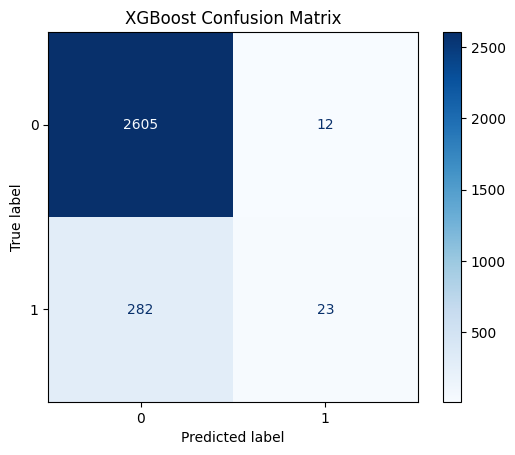

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ... (your existing code for data preparation) ...

# Train an XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=10, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions using the current X_test
y_pred_xgb = xgb_model.predict(X_test)  # This line is crucial for fixing the error

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)  # Use the correct predictions here
report = classification_report(y_test, y_pred_xgb)  # Use the correct predictions here

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# Now, create the confusion matrix using the updated y_pred_xgb
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=xgb_model.classes_).plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()
